In [134]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [135]:
df = pd.read_csv('titanic.csv')
print (df.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [136]:
round(df['survived'].mean(),2)

0.38

In [137]:
round(df.groupby('pclass').mean(),2)

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1.0,0.62,39.16,0.44,0.37,87.51,162.83
2.0,0.43,29.51,0.39,0.37,21.18,167.39
3.0,0.26,24.82,0.57,0.40,13.30,155.82


In [138]:
df.drop(['body','name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
#df.dtypes
#df.info()
df.apply(pd.to_numeric, errors = 'ignore')
df.fillna(0, inplace=True)
print(df.head())

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0     1.0       1.0  female  29.0000    0.0    0.0   24160  211.3375       B5   
1     1.0       1.0    male   0.9167    1.0    2.0  113781  151.5500  C22 C26   
2     1.0       0.0  female   2.0000    1.0    2.0  113781  151.5500  C22 C26   
3     1.0       0.0    male  30.0000    1.0    2.0  113781  151.5500  C22 C26   
4     1.0       0.0  female  25.0000    1.0    2.0  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S    0  Montreal, PQ / Chesterville, ON  
3        S    0  Montreal, PQ / Chesterville, ON  
4        S    0  Montreal, PQ / Chesterville, ON  


In [139]:
class_sex_group = df.groupby(['pclass','sex']).mean()
class_sex_group

survived        age     sibsp     parch        fare
pclass sex                                                        
0.0    0       0.000000   0.000000  0.000000  0.000000    0.000000
1.0    female  0.965278  34.208333  0.555556  0.472222  109.412385
       male    0.340782  34.611266  0.340782  0.279330   69.888385
2.0    female  0.886792  26.720912  0.500000  0.650943   23.234827
       male    0.146199  28.472709  0.327485  0.192982   19.904946
3.0    female  0.490741  15.611883  0.791667  0.731481   15.324250
       male    0.152130  18.378972  0.470588  0.255578   12.390278

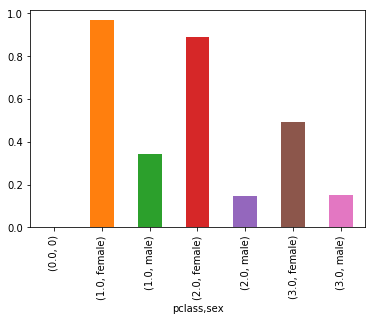

In [140]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
class_sex_group['survived'].plot.bar()

In [141]:
age_group = pd.cut(df["age"], np.arange(0, 90, 10))
age_group_res = df.groupby(age_group).mean()
age_group_res

,pclass,survived,age,sibsp,parch,fare
age,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,63.681944
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567


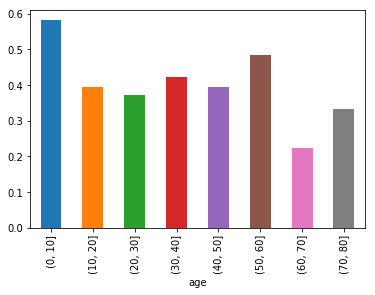

In [142]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
age_group_res['survived'].plot.bar()

In [143]:
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [144]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
df = handle_non_numerical_data(df)
print (df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0     1.0       1.0    1  29.0000    0.0    0.0     769  211.3375     44   
1     1.0       1.0    2   0.9167    1.0    2.0     109  151.5500     87   
2     1.0       0.0    1   2.0000    1.0    2.0     109  151.5500     87   
3     1.0       0.0    2  30.0000    1.0    2.0     109  151.5500     87   
4     1.0       0.0    1  25.0000    1.0    2.0     109  151.5500     87   

   embarked  boat  home.dest  
0         3    16        195  
1         3    27         67  
2         3     0         67  
3         3     0         67  
4         3     0         67  


In [145]:
df.drop(['sex','boat'], 1, inplace=True)

In [146]:
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [147]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [149]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == int(y[i]):
        correct = correct + 1
accuracy = round(correct/float(len(X))*100,2)
print('Model Accuracy :: ' + str(accuracy) + '%')

Model Accuracy :: 67.94%
